# Wrangle and Analyze Data
# #WeRateDogs 

WeRateDogs is a twitter account that rates dogs. we are using data from their account for data wrangling course.<br>
A project which is part of Udacity Data Analyst Nanodegree.

#### Steps to Effective Data Wrangling are: 
1. We will first gather data from 3 differents sources using different methods
2. Then Assess the data visually and programatically for quality and tidiness issues. 
3. And then we are going to resolve those issues. 
4. The last step is no longer data wrangling, we are going to analyze the data. Give insights and make vizualisations. 


## Gathering data
We have 3 sources of data to gather for this analysis.
1. twitter-archive-enhanced.csv, this file was already provided as a csv file. we are going to use pandas read_csv to import the file
2. image_predictions.tsv by using request library to download it
3. By using tweepy, extract data  from twitter API and store it in a file named tweet_json.txt

In [133]:
# importing all the library that we will need
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt;plt.rcdefaults()
import seaborn as sns
sns.set_style('darkgrid')

### Importing file 1: twitter-archive-enhanced.csv

In [2]:
#import the twitter-archive-enhanced.csv
#Reading a sample to have a feel of the data
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1289,708149363256774660,NaN,NaN,2016-03-11 04:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jebberson. He's the reigning hide and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708149363...,10,10,Jebberson,None,None,None,None
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,None,None,None
1502,692041934689402880,NaN,NaN,2016-01-26 17:50:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Teddy. His head is too heavy. 13/10 (v...,NaN,NaN,NaN,https://vine.co/v/iiI3wmqXYmA,13,10,Teddy,None,None,None,None
2114,670433248821026816,NaN,NaN,2015-11-28 02:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None


### Using Request to programatically download  image_predictions.tsv from given url

In [3]:
#create a variable containing the url from which we want to request Data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#save the requested url in a file named image_predictions.tsv
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
#import the file in a dataframe with pandas
image_df = pd.read_csv('image_predictions.tsv', delimiter='\t')
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True


### Retrivieng Data from Twitter API

In [4]:
#authentication with twitter API using 
auth = tweepy.OAuthHandler('p2BWpeoQLwgyO9HNBAeYAwSAu' ,'fRnHPR225sL9lQtgvANK3tZMVh3TrwkPw6TkRqHMsY3EWgHW7y')
auth.set_access_token('1090421968623390720-cenMGb4xHFMnuyBXBZuLH4QuCRIaKZ','XMGq0HEaSWrSXVQMT080gkPToTx6HwuH0X4AWCaVGlR4R')

#create api to create to twitter with credetianls
api = tweepy.API(auth , wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
#putting tweet ids from archive_df in a list. the list will be used to query twitter api for more data
tweet_ids = df_archive['tweet_id'].tolist()

In [6]:
#looping through the list of tweet_ids to query to twitter API, saving the changes to tweet.json file
with open('tweet_json.txt', 'a', encoding='utf8') as file:
  for tweet_id in tweet_ids:
     try:
         tweet = api.get_status(tweet_id, tweet_mode='extended')
          json.dump(tweet._json, file)
           file.write('\n')
        except tweepy.TweepError as e:
          #print (e.api_code)
           print (e.reason)

In [7]:
#taking the api data from json file to panda dataframe
api_data = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        try: 
            json_data = json.loads(line)
            api_data.append(json_data)
        except:
            continue
api_data_df = pd.DataFrame(api_data)
api_data_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32601,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6124,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24551,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4055,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41308,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8425,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39500,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9133,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19850,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,3037,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
#counting twitter_ids that where not found in the API 
df_archive.tweet_id.count() - api_data_df.id.count()

19

In [9]:
# As specified in the project instructions, I am going to only keep retweet_count and liked tweet(favorite count)
twitter_api_df = api_data_df[['id', 'retweet_count', 'favorite_count']]
twitter_api_df.head()

,id,retweet_count,favorite_count
0,892177421306343426,6124,32601
1,891815181378084864,4055,24551
2,891689557279858688,8425,41308
3,891327558926688256,9133,39500
4,891087950875897856,3037,19850


## Assessing Data 
In this section we are going to assess the 3 datasets that we have collected for issues to fix. we will identify and list them. those issues will be fixed in a later section. 
we will both assess the datasets visually and programatically using pandas. 

#### Dataset 1: Twitter Archive
This is the twitter archive data from "twitter-archive-enhanced.csv" file. we imported it in a dataframe called df_archive. 

In [10]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Quality Issues: 
while visually assessing the dataset visually

In [12]:
df_archive.duplicated().sum()

0

In [13]:
df_archive.name.isnull().sum()

0

In [14]:
len(df_archive.name.unique())

957

In [15]:
df_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
an            7
Daisy         7
Toby          7
Bailey        7
Stanley       6
Dave          6
Leo           6
Rusty         6
Oscar         6
Milo          6
Jack          6
Bella         6
Scout         6
Koda          6
Jax           6
George        5
           ... 
Kobe          1
Chesney       1
Rolf          1
Jangle        1
Barry         1
Sora          1
Damon         1
Spencer       1
Noah          1
Mary          1
Gerbald       1
Rueben        1
Dunkin        1
Bayley        1
Maya          1
Shawwn        1
Jennifur      1
Shadoe        1
Monty         1
Alf           1
Luther        1
Blue          1
Rupert        1
Lulu          1
Sunshine      1
Iroh          1
Herb          1
Rey           1
Ester         1
old           1
Name: name, Length: 957,

In [16]:
df_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
df_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
df_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
df_archive['rating_numerator'].count(), df_archive['rating_numerator'].isnull().sum()

(2356, 0)

In [21]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
df_archive['rating_denominator'].count(), df_archive['rating_denominator'].isnull().sum()

(2356, 0)

In [23]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Dataset 2: Image Prediction File

In [24]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_df.duplicated().sum()

0

#### Datasets 3: Data from API

In [27]:
twitter_api_df.sample(500)

,id,retweet_count,favorite_count
260,841320156043304961,5786,20594
2269,667176164155375616,464,611
1755,678255464182861824,394,1644
524,807010152071229440,4189,13927
789,772152991789019136,1212,4005
887,758405701903519748,2077,5490
1595,685321586178670592,684,2768
311,834209720923721728,5127,21614
1242,710272297844797440,1331,4721
1041,741793263812808706,1604,4773


In [28]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id                2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [29]:
twitter_api_df.duplicated().sum()

0

In [30]:
twitter_api_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [31]:
image_df.shape

(2075, 12)

In [32]:
twitter_api_df.shape

(2337, 3)

In [33]:
df_archive.shape

(2356, 17)

### Issues Found: 

#### Data Quality Issues:

1. In the twitter archive file, (from the csv) I doubt that 745 dogs's name is None. I would tend to consider this as missing value. this is a quality issue and should be replaced by NA for missing value. 

2. the columns doggo , floofer, pupper and puppo which are dogs stage have the value None (python equivalent of NA). which is an issue because when doing programatic assessment with pandas, its shows no null values


3. in_reply_to_status_id  with 78 non-null float64 has too many missing values, it would be hard to do any analysis with so many missing values. 

4.  in_reply_to_user_id  with only 78 non-null float64 has too many missing values, it would be hard to do any analysis with this column, to drop


5. retweeted_status_user_id  has too many  missing values    181 non-null float64

6. retweeted_status_timestamp    has too many missing values 181 non-null object

7. retweeted_status_timestamp    with only 181 non-null object has too many  missing values to be useful. The column will be dropped. 
 

8. 19 tweet_id failed while making taking data from the twitter api. 

9. I also doubt that  55 dogs are really called "a". This might be a typo. 

#### Tidiness Issues: 

1. rename the name in the columns for image predictions. from p1 to breed_prediction_1

2. merge the archive dataset and api dataset based on tweet_ids

3. move the image and breed_prediction columns from image_df to new_df


## Cleaning 

##### Quality Issues
1. In the df_archive file, in the column name, replace value None by NA

In [34]:
# cleaning
df_archive['name'].replace('None', np.nan, inplace=True)
#test
df_archive.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


2. The columns doggo , floofer, pupper and puppo which are dogs stage have the value None.I am going to replace None with NA

In [35]:
#replacing python None by pandas NA
df_archive['doggo'].replace('None', np.nan, inplace=True)
df_archive['floofer'].replace('None', np.nan, inplace=True)
df_archive['pupper'].replace('None', np.nan, inplace=True)
df_archive['puppo'].replace('None', np.nan, inplace=True)
#test
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

3,4,5,6,7. removing columns that would be hard to use due to too many missing values 

In [36]:
# clean
df_archive.drop(['in_reply_to_status_id'], inplace=True, axis=1)
df_archive.drop(['in_reply_to_user_id'], inplace=True, axis=1)
df_archive.drop(['retweeted_status_id'], inplace=True, axis=1)
df_archive.drop(['retweeted_status_user_id'], inplace=True, axis=1)
df_archive.drop(['retweeted_status_timestamp'], inplace=True, axis=1)
# test
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


8. Removing the twitter_id that where not found in the API. 19 ids

In [37]:
#counting twitter_ids that where not found in the API 
df_archive.tweet_id.count() - api_data_df.id.count()

19

In [38]:
#only keeping successful tweet_ids
df_archive_new = df_archive[df_archive.tweet_id.isin(twitter_api_df.id.tolist())]
#test
df_archive_new.tweet_id.count() - api_data_df.id.count()

0

In [39]:
# cleaning
df_archive_new['name'].replace('a', np.nan, inplace=True)
#test
df_archive_new.query('name == "a"')

C:\Users\gwiza\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Tidiness Issues

In [40]:
# rename the name in the columns for image predictions. from p1 to breed_prediction
image_df.rename(columns={'p1':'breed_prediction'}, inplace=True)
#testing to verify name change
image_df.columns.tolist()

['tweet_id',
 'jpg_url',
 'img_num',
 'breed_prediction',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [41]:
# merge the archive dataset and twitter_api_df dataset based on common tweet_ids
new_df = df_archive_new.merge(twitter_api_df,how='inner', left_on='tweet_id', right_on='id')
#test
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2336
Data columns (total 15 columns):
tweet_id              2337 non-null int64
timestamp             2337 non-null object
source                2337 non-null object
text                  2337 non-null object
expanded_urls         2278 non-null object
rating_numerator      2337 non-null int64
rating_denominator    2337 non-null int64
name                  1544 non-null object
doggo                 96 non-null object
floofer               10 non-null object
pupper                256 non-null object
puppo                 30 non-null object
id                    2337 non-null int64
retweet_count         2337 non-null int64
favorite_count        2337 non-null int64
dtypes: int64(6), object(9)
memory usage: 292.1+ KB


In [42]:
# move the image and breed_prediction columns from image_df to new_df
image_df_new = image_df[['tweet_id', 'jpg_url', 'breed_prediction']]
final_df = new_df.merge(image_df_new,how='inner', on='tweet_id')
final_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count,jpg_url,breed_prediction
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,892177421306343426,6124,32601,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,891815181378084864,4055,24551,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,891689557279858688,8425,41308,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,891327558926688256,9133,39500,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,891087950875897856,3037,19850,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever


## Storing Cleaned Dataframe to csv file

In [43]:
#storing the clean dataframe to a csv file 
final_df.to_csv('twitter_archive_master.csv')

## ##WeRateDog Clean Dataset Analysis

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 17 columns):
tweet_id              2064 non-null int64
timestamp             2064 non-null object
source                2064 non-null object
text                  2064 non-null object
expanded_urls         2064 non-null object
rating_numerator      2064 non-null int64
rating_denominator    2064 non-null int64
name                  1434 non-null object
doggo                 80 non-null object
floofer               8 non-null object
pupper                222 non-null object
puppo                 24 non-null object
id                    2064 non-null int64
retweet_count         2064 non-null int64
favorite_count        2064 non-null int64
jpg_url               2064 non-null object
breed_prediction      2064 non-null object
dtypes: int64(6), object(11)
memory usage: 290.2+ KB


#### Most popular Names in the Dataset

In [77]:
#checking value counts for each name
final_df.name.value_counts()

Lucy          10
Penny         10
Charlie       10
Oliver        10
Cooper        10
Tucker        10
Winston        8
Sadie          8
Lola           8
Bo             8
Daisy          7
the            7
Toby           7
an             7
Dave           6
Rusty          6
Bella          6
Koda           6
Scout          6
Jax            6
Milo           6
Stanley        6
Bailey         6
Alfie          5
Buddy          5
Larry          5
Oscar          5
Louis          5
Leo            5
Chester        5
              ..
Roscoe         1
Berb           1
Lilli          1
Callie         1
Mabel          1
Shaggy         1
Blue           1
Gustav         1
Gerbald        1
Mac            1
incredibly     1
Binky          1
Frönq          1
Hazel          1
Bubba          1
Rose           1
Spencer        1
Mary           1
Rueben         1
Luther         1
Dunkin         1
Bayley         1
Maya           1
Shawwn         1
Jennifur       1
Rinna          1
Shadoe         1
Noah          

### Most common Type of Breed (from prediction)

In [88]:
popular_breed = final_df.breed_prediction.value_counts()
breed=popular_breed.head(10)
breed

golden_retriever      150
Labrador_retriever    100
Pembroke               87
Chihuahua              81
pug                    57
chow                   44
Samoyed                42
toy_poodle             39
Pomeranian             38
malamute               30
Name: breed_prediction, dtype: int64

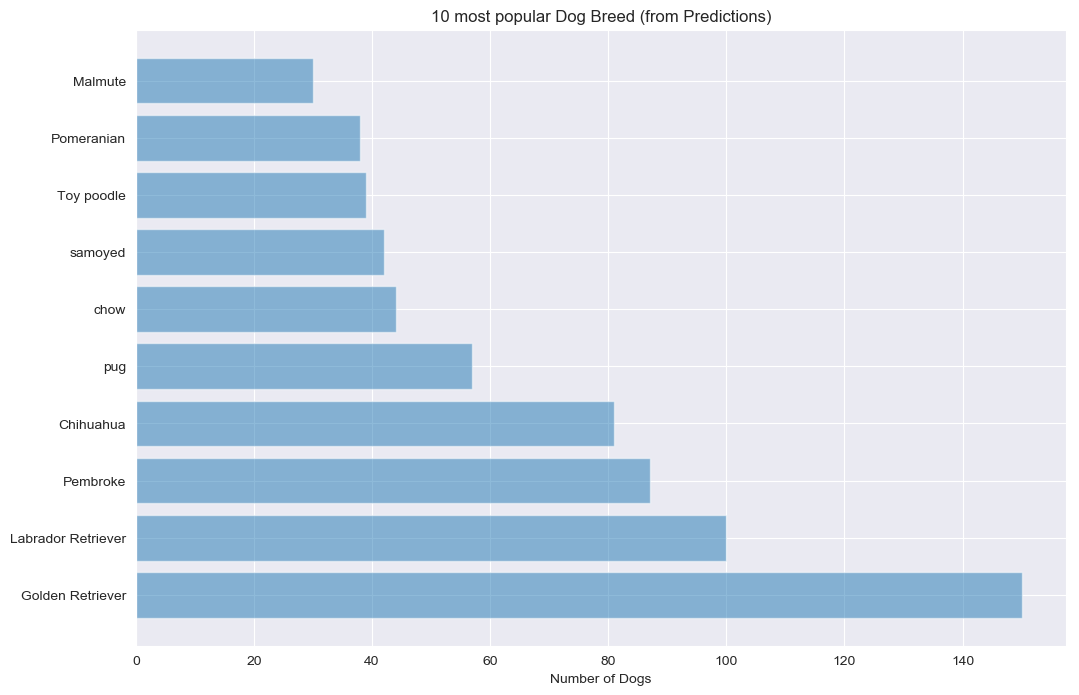

In [154]:
breed_type = ('Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'pug', 'chow', 'samoyed', 'Toy poodle', 'Pomeranian', 'Malmute')
breed_count = [150, 100, 87, 81, 57, 44, 42, 39, 38,30]
 
fig,ax = plt.subplots(figsize = (12,8))
ax.barh(breed_type, breed_count, alpha=0.5)
plt.yticks(breed_type)
plt.xlabel('Number of Dogs')
plt.title('10 most popular Dog Breed (from Predictions)')
plt.show()

### The Average number of likes is 8385 per tweet!

In [74]:
final_df.favorite_count.describe()

count      2064.000000
mean       8385.993702
std       12638.382926
min           0.000000
25%        1597.000000
50%        3685.500000
75%       10485.750000
max      163924.000000
Name: favorite_count, dtype: float64

### In Average each tweet is retweeted 2792 times! 

In [75]:
final_df.retweet_count.describe()

count     2064.000000
mean      2792.616764
std       4862.762254
min         11.000000
25%        594.750000
50%       1316.500000
75%       3222.000000
max      83381.000000
Name: retweet_count, dtype: float64

### The average rating is 12.26/10

In [63]:
final_df.rating_numerator.describe()

count    2064.000000
mean       12.266473
std        40.788409
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

# Insights

### Most Popular Names:

* Lucy 
* Penny 
* Charlie
* Oliver 
* Cooper
* Tucker  

All names on this list has 10 occurences each. 

### Popular Dog Breed: 

The Golden Retriever is bar far the most frequent dog breed(150 times). followed by the Labrador Retriever (100 times). 

###  The Average number of likes is 8385 in the dataset

The average tweet in this dataset has favorite_count of 8385 in average. which quite high, meaning that in average, many people enjoy the post. the most liked tweet being at 163924 likes. 

### In Average each tweet is retweeted 2792 times!

In average a WeRateDogs tweet is retweeted 2792 times. the most retweeted tweet being at 83381 according to the data we have.

### The average rating is 12.26/10
The average Rating for the dogs in this dataset is 12.26/10

In [146]:
#making a query to find pictures to illustrate the report
most_liked = final_df.query('breed_prediction == "golden_retriever" & favorite_count > 8385')
most_liked.jpg_url.sample(5)

117     https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg
1352    https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg
288     https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg
904     https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg
1545    https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg
Name: jpg_url, dtype: object

In [152]:
#making a query to randomly find a lucy picture. will also be used in act_report.pdf
lucy=final_df.query('name == "Lucy"')
lucy.jpg_url.sample()

1137    https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg
Name: jpg_url, dtype: object

## Resources and References: 

* Requests Official Documentation: http://docs.python-requests.org/en/master/user/quickstart/#response-content
* Dowloading files using Requests: https://www.geeksforgeeks.org/downloading-files-web-using-python/
* Importing tsv file: https://www.kaggle.com/tinoswe/split-python-dataframe
* Using Tweepy to query twitter API : http://docs.tweepy.org/en/3.7.0/getting_started.html
* Retrieving Data from Twitter API: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html <br>
https://github.com/SThornewillvE/Udacity-Project---Data-Wrangling/blob/master/wrangling-act.ipynb <br>
https://github.com/S-Tabor/udacity-data-wrangling-project/blob/master/wrangle_project_final.ipynb <br>
https://github.com/xhlow/dand-t2-p3-data-wrangling/blob/master/wrangle_act.ipynb
* Matplotlib Bar chart : https://pythonspot.com/matplotlib-bar-chart/

This is the End, Thank you